# Parkinson's Disease Classification
The students should perform a statistical analysis of the datasets in advance and summarize relevant implications in the report, such as the underlying distributions and hypothesized forms feature dependency.

## Preprocessing
In accordance with the properties of the input dataset and the behavior of the target learning algorithm, the students are allowed to apply preprocessing techniques when needed or under a solid conjecture of its potential impact on learning.

## Data Set Information
The data used in this study were gathered from 188 patients with PD (107 men and 81 women) with ages ranging from 33 to 87 (65.1Â±10.9) at the Department of Neurology in CerrahpaÅŸa Faculty of Medicine, Istanbul University. The control group consists of 64 healthy individuals (23 men and 41 women) with ages varying between 41 and 82 (61.1Â±8.9). During the data collection process, the microphone is set to 44.1 KHz and following the physicianâ€™s examination, the sustained phonation of the vowel /a/ was collected from each subject with three repetitions.

## Attribute Information
Various speech signal processing algorithms including Time Frequency Features, Mel Frequency Cepstral Coefficients (MFCCs), Wavelet Transform based Features, Vocal Fold Features and TWQT features have been applied to the speech recordings of Parkinson's Disease (PD) patients to extract clinically useful information for PD assessment.

# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from scipy import stats

Skipping the first row of csv file, so that we get labels on columns

In [2]:
df = pd.read_csv("dataset/pd_speech_features.csv", skiprows=1)

Exploring shape and form of the data, and data types

In [3]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


Checking if there are null values

In [4]:
df.isna().any().sum()

0

In [5]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [6]:
df.shape

(756, 755)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


As we can see, the dataset is very feature rich (lots of columns), which will probably affect algorithm choise. Let's study the target variable distribution.

1    563
0    192
Name: class, dtype: int64


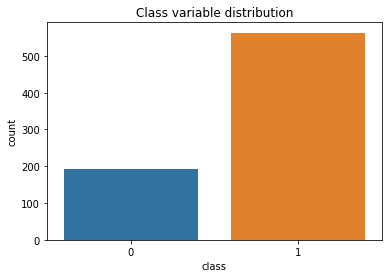

In [25]:
sns.countplot(df['class']).set_title('Class variable distribution')
print(df['class'].value_counts())

Dataset is somewhat unbalanced. We will deal with this by making balanced dataset and trying model performance with it.

## Duplicate values

Investigating if there are any duplicate values in the dataset

In [10]:
df.duplicated().value_counts()
df[df.id == 37]

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
111,37,0,0.79067,0.58465,0.64250,321,320,0.006004,0.000143,0.00207,...,3.5800,4.0251,2.9654,3.8369,4.2973,3.6458,3.1854,3.7708,10.0693,1
112,37,0,0.75781,0.57600,0.65037,310,309,0.006220,0.000167,0.00196,...,15.4756,9.9453,7.0538,5.7651,3.8592,4.0615,14.3037,20.1550,66.3533,1
113,37,0,0.79067,0.58465,0.64250,321,320,0.006004,0.000143,0.00207,...,3.5800,4.0251,2.9654,3.8369,4.2973,3.6458,3.1854,3.7708,10.0693,1


Dropping duplicate values

In [11]:
df.drop_duplicates(keep='first', inplace=True)
df[df.id == 37]

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
111,37,0,0.79067,0.58465,0.64250,321,320,0.006004,0.000143,0.00207,...,3.5800,4.0251,2.9654,3.8369,4.2973,3.6458,3.1854,3.7708,10.0693,1
112,37,0,0.75781,0.57600,0.65037,310,309,0.006220,0.000167,0.00196,...,15.4756,9.9453,7.0538,5.7651,3.8592,4.0615,14.3037,20.1550,66.3533,1


### Correlation matrix

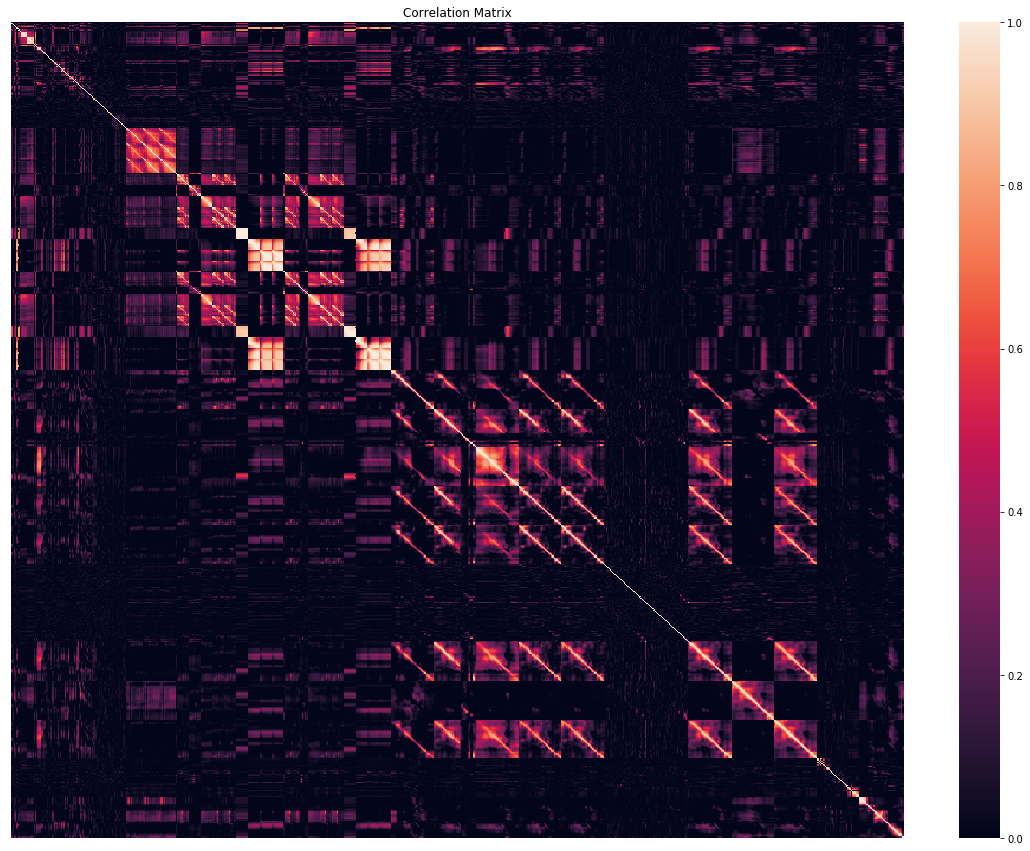

In [12]:
fig, ax = plt.subplots(figsize=(20, 15))

# Calculate correlations
corr = df.corr()

sns.heatmap(data=corr, vmin=0, vmax=1, xticklabels=False, yticklabels=False)
ax.set(title='Correlation Matrix')
plt.show()

### Isolating 100 most correlated variables

In [13]:
variable_corr = df[df.columns[1:]].corr()['class'][:].sort_values()

# 50 most negatively correlated variables
neg_50var = variable_corr.head(50)

# 50 most positively correlated variables
pos_50var = variable_corr.iloc[-51:-1]

print(neg_50var.head())
print()
print(pos_50var.tail())

tqwt_stdValue_dec_12      -0.393890
tqwt_maxValue_dec_12      -0.393513
tqwt_stdValue_dec_11      -0.391233
tqwt_entropy_log_dec_12   -0.382218
tqwt_maxValue_dec_11      -0.381136
Name: class, dtype: float64

std_8th_delta_delta     0.364190
tqwt_minValue_dec_13    0.367192
tqwt_minValue_dec_11    0.367660
tqwt_minValue_dec_12    0.397071
mean_MFCC_2nd_coef      0.399714
Name: class, dtype: float64


## Preprosessing

### Normalization

In [30]:
from sklearn.preprocessing import Normalizer

#Shufling the dataframe
df.sample(frac=1)

transformer = Normalizer().fit(df)
df_norm = pd.DataFrame(transformer.transform(df), columns=df.columns)
df_norm.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,7.550000e+02,7.550000e+02,7.550000e+02,7.550000e+02,7.550000e+02,7.550000e+02,7.550000e+02,7.550000e+02,7.550000e+02,7.550000e+02,...,7.550000e+02,7.550000e+02,7.550000e+02,7.550000e+02,7.550000e+02,7.550000e+02,7.550000e+02,7.550000e+02,7.550000e+02,7.550000e+02
mean,1.670324e-08,9.329716e-11,1.000824e-10,9.647789e-11,7.169281e-11,3.794141e-08,3.774014e-08,9.803674e-13,5.271087e-14,4.027134e-13,...,2.617421e-09,2.609977e-09,2.450783e-09,1.948826e-09,1.712670e-09,1.743615e-09,2.098750e-09,2.077849e-09,4.438458e-09,1.077148e-10
std,1.553713e-08,1.100409e-10,6.502037e-11,6.426571e-11,6.075105e-11,1.567480e-08,1.551656e-08,8.764519e-13,1.326774e-13,7.887923e-13,...,4.278342e-09,3.940150e-09,3.885984e-09,3.369601e-09,2.995547e-09,2.801587e-09,2.854305e-09,2.628359e-09,5.985146e-09,9.608732e-11
min,0.000000e+00,0.000000e+00,1.458697e-12,8.874396e-12,4.998437e-12,3.406763e-10,1.703382e-10,2.970239e-14,3.844078e-16,6.674493e-15,...,8.197558e-11,8.155208e-11,6.885815e-11,7.299686e-11,7.110653e-11,8.633991e-11,8.445778e-11,6.031149e-11,7.803848e-11,0.000000e+00
25%,6.483583e-09,0.000000e+00,5.560352e-11,5.395368e-11,3.166088e-11,2.819754e-08,2.811418e-08,3.890262e-13,4.728122e-15,8.790416e-14,...,3.636604e-10,4.470635e-10,3.889307e-10,3.225857e-10,2.985874e-10,3.175793e-10,4.023161e-10,4.070696e-10,4.285211e-10,0.000000e+00
50%,1.247697e-08,8.151660e-11,8.608750e-11,7.793923e-11,5.254294e-11,3.558955e-08,3.534522e-08,6.870403e-13,1.020215e-14,1.791690e-13,...,6.604152e-10,8.273251e-10,8.217456e-10,6.282748e-10,5.715656e-10,5.959962e-10,8.936795e-10,9.698282e-10,1.386277e-09,1.015299e-10
75%,2.197742e-08,1.659385e-10,1.262608e-10,1.208848e-10,8.800294e-11,4.540599e-08,4.510852e-08,1.273158e-12,3.248728e-14,3.974817e-13,...,2.501795e-09,2.997454e-09,2.291462e-09,1.762961e-09,1.489079e-09,1.646840e-09,2.465359e-09,2.625316e-09,6.370744e-09,1.553837e-10
max,1.207492e-07,6.243378e-10,5.008460e-10,4.864903e-10,4.341760e-10,1.857504e-07,1.837423e-07,5.552537e-12,1.846550e-12,8.368565e-12,...,3.553488e-08,2.696486e-08,2.568125e-08,2.251232e-08,1.882247e-08,1.683825e-08,1.683374e-08,1.541456e-08,3.276195e-08,6.243378e-10


### Balancing

Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information. (https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets)

SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [29]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Oversampling with SMOTE
RANDOM_STATE = 42

# Extracting to dataframes containing minority and majority class, converting them into ndarray
df_class_0 = df[df['class'] == 0].values
df_class_1 = df[df['class'] == 1].values

#smote = SMOTE(ratio='minority', random_state=RANDOM_STATE)
#df_x_smote, df_y_smote = smote.fit_sample(x, y)

array([[ 11.     ,   1.     ,   0.82127, ...,   4.5811 ,   6.2012 ,
          0.     ],
       [ 11.     ,   1.     ,   0.80339, ...,   4.4758 ,   5.3617 ,
          0.     ],
       [ 11.     ,   1.     ,   0.84385, ...,   5.984  ,   4.2463 ,
          0.     ],
       ...,
       [251.     ,   0.     ,   0.88389, ...,   3.3545 ,   5.0424 ,
          0.     ],
       [251.     ,   0.     ,   0.83782, ...,   2.8332 ,   3.7131 ,
          0.     ],
       [251.     ,   0.     ,   0.81304, ...,   2.6217 ,   3.1527 ,
          0.     ]])

SelectKBest!

## Training Models

In [ ]:
#Stratified k folds
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

Train models with cross validation, stratified kfolds and train-test split, using unmodified dataset, normalized dataset and normalized 

Use feature selection when using random forest, because it works well only when features are diverse and not correlated

## Naive Bayes

Important thing about NB is distribution of numerical variables 

## KNN

## Notes

Apply all algorithms to both datasets

Focus on classification on the first dataset

Look for classification dataset PD with clustering. Are there some subgroups?

Try normalized standardized data. Look into standardization!

Performance for sampled data

When evaluating models: Look into sensitivity, spesifisity